# Who Are The Rust Users In 2023?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import blog_utils as bu

%matplotlib inline


Help on function pie_chart in module blog_utils:

pie_chart(df, df_title, fig_save=False)
    Plots a pie chart showing the proportions of the passed series.
    
    Parameters:
      df (DataFrame): A frame to visualize
      df_title (string): The title of the pie chart
      fig_save (boolean): Will keep a copy of the figure in the './images/' directory

Help on function two_pie_chart in module blog_utils:

two_pie_chart(df1, df1_title, df2, df2_title, mode, fig_title, fig_save=False)
    Plots two pie charts together and showing the proportions of the passed series.
    
    Parameters:
      df1 (DataFrame): First data frame
      df1_title (string): The title of the 1st pie chart
      df2 (DataFrame): Second data frame
      df2_title (string): The title of the 2ndt pie chart
      mode (string): To display the sub-plots side-by-side (mode='row) or top-bottom (mode='col').
      fig_title(string): The name of the figure to save.
      fig_save (boolean): Will keep a copy of the


## 1- INTRODUCTION

According to the *2023 Stack Overflow Annual Survey*, the **Rust** language is in its eighth year as the most loved and admired language among professionnal developers (with 80% of developers saying they want to continue using it). 

The Rust language is contantly growing in popularity, from 3.2% in 2019 to 13.05% in 2023, and it is winning its place on the map of viable computing options.

As a forward-looking developer, you can turn to your favorite search engine to research, read and learn more about the usual questions related to the emergence of such a language: What is Rust? What is it used for? Who is using Rust? Should I learn and engage with Rust in 2023? 

You may also take a look at the [2023 Stack Overflow Annual Survey](https://survey.stackoverflow.co/2023/) 
which is conducted every year among tens of thousands of developers who share how they learn new and level up, 
which tools they’re using, how much they earn and how they are looking ahead to the future.

This kind of survey provides a wealth of information about the software developer community, the tools and the 
programming environments in use today.
With respect to the Rust language, you will find the following information:
- the number of users and its [popularity](https://survey.stackoverflow.co/2023/#section-most-popular-technologies-programming-scripting-and-markup-languages) compared to other technologies  
- the user satisfaction, apprehension and [desire to use](https://survey.stackoverflow.co/2023/#section-admired-and-desired-programming-scripting-and-markup-languages)
- the [pay rating](https://survey.stackoverflow.co/2023/#section-top-paying-technologies-top-paying-technologies) among other languages
- and a nice [mapping](https://survey.stackoverflow.co/2023/#section-worked-with-vs-want-to-work-with-programming-scripting-and-markup-languages) of the languages that users are interested in versus the ones they are already using. 

### Getting to better know the Rust developers
 
This Jupyter notebook will use the results of the **2023 Stack Overflow Annual Developer Survey** (available [here](https://insights.stackoverflow.com/survey)) to collect some more insights about the current Rust community. 

We will do so by investigating the following four questions:   
- *What are the job types of the Rust users?*
- *What are the best Rust paying jobs?*
- *What are the languages used in 2023 by the developers who plan to work with Rust in 2024?*
- *In what other languages do the Rust users plan to work in 2024?*


## 2- GETTING TO KNOW THE DATASET
In this section, we take a look at the dataset and we start wrangling the data to better understand the characteristics of the dataset.

### 2.1 CSV file and data shape

In [2]:
df = pd.read_csv('../dataset/survey_results_public.csv')
schema = pd.read_csv('../dataset/survey_results_schema.csv')

respondents = df.shape[0]
num_cols    = df.shape[1]

print(f"\n[INFO][SURVEY] The dataset contains {respondents} rows and {num_cols} columns.")

df.head(3)


[INFO][SURVEY] The dataset contains 89184 rows and 84 columns.


,ResponseId,Q120,MainBranch,Age,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,ProfessionalTech,Industry,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,I agree,None of these,18-24 years old,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I agree,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,Hobby;Contribute to open-source projects;Boots...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;Friend or fam...,Formal documentation provided by the owner of ...,...,1-2 times a week,10+ times a week,Never,15-30 minutes a day,15-30 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,285000.0
2,3,I agree,I am a developer by profession,45-54 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby;Professional development or self-paced l...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Formal documentation provided by the owner of ...,...,6-10 times a week,6-10 times a week,3-5 times a week,30-60 minutes a day,30-60 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,250000.0


### 2.2 Continuous variables
Surprinsingly, the 2023 survey does not provide many continuous variables. This will make it harder to  build a predictive model because we'll need to invest more work into infering many values from categorical variables. Therefore, we'll stick to a descriptive statistics analysis for this exercise. 

In [3]:
df.describe()

,ResponseId,CompTotal,WorkExp,ConvertedCompYearly
count,89184.000000,4.822500e+04,43579.000000,4.801900e+04
mean,44592.500000,1.036807e+42,11.405126,1.031101e+05
std,25745.347541,2.276847e+44,9.051989,6.814188e+05
min,1.000000,0.000000e+00,0.000000,1.000000e+00
25%,22296.750000,6.300000e+04,5.000000,4.390700e+04
50%,44592.500000,1.150000e+05,9.000000,7.496300e+04
75%,66888.250000,2.300000e+05,16.000000,1.216410e+05
max,89184.000000,5.000000e+46,50.000000,7.435143e+07


array([[<Axes: title={'center': 'ResponseId'}>,
        <Axes: title={'center': 'CompTotal'}>],
       [<Axes: title={'center': 'WorkExp'}>,
        <Axes: title={'center': 'ConvertedCompYearly'}>]], dtype=object)

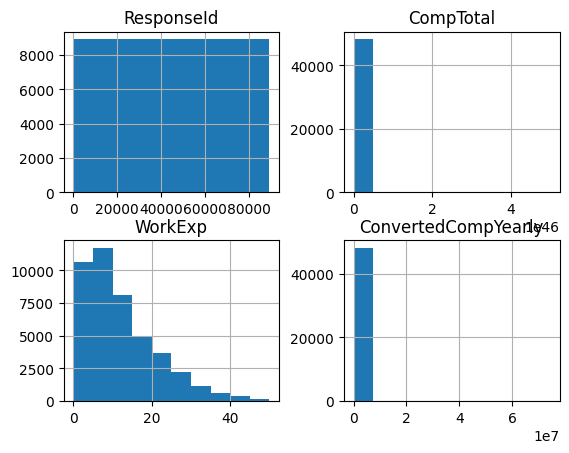

In [4]:
df.hist()

### 2.1- Set the verbosity of the notebook 
  FYI - Utilities and helpers functions are available in the module 'blog_utils.py'. 

In [5]:
# Set the verbosity to [0|1|2|..]
VERBOSE = 3

## 3- DATA PREPARATION

### 3.1- Refining the statistical population per branch
The survey collects responses from people belonging to various branches.
However, we are only interrested in the group of **professional developers**.


[INFO][SURVEY] The 'MainBranch' column of the survey contains the following answers:
MainBranch
I am a developer by profession                                                           67237
I am not primarily a developer, but I write code sometimes as part of my work/studies     8954
I am learning to code                                                                     4961
I code primarily as a hobby                                                               4960
I used to be a developer by profession, but no longer am                                  1861
None of these                                                                             1211
Name: count, dtype: int64


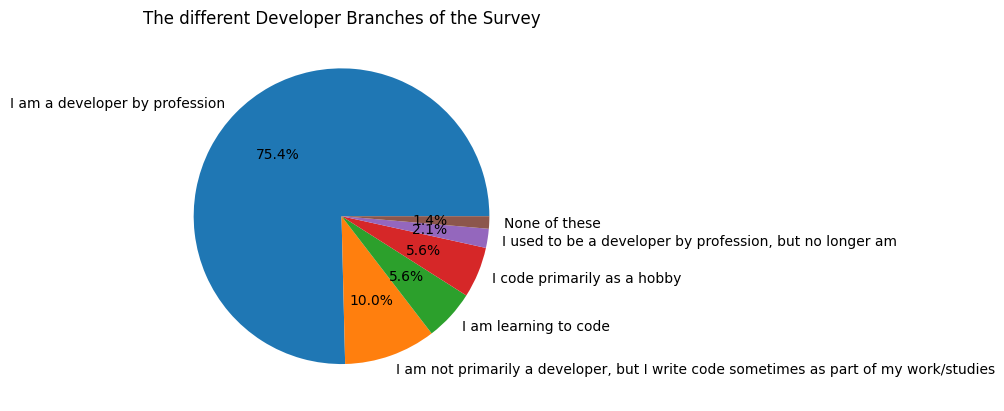

[INFO][STUDY] Our investigation will solely focus on the population of 'developers by profession' who are 67237 and represent 75.4% of the respondents.

[INFO][STUDY] The 'MainBranch' column of the study contains the following answers:
MainBranch
I am a developer by profession    67237
Name: count, dtype: int64


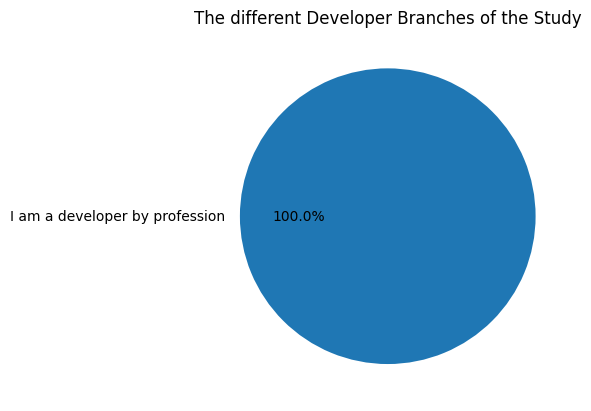

In [6]:
# STEP-0: Get to know the content of the 'MainBranch' column
if VERBOSE > 2:
    print(f"\n[INFO][SURVEY] The \'MainBranch\' column of the survey contains the following answers:")
    print(df['MainBranch'].value_counts(dropna=False))
    bu.pie_chart(df.MainBranch.value_counts(), "The different Developer Branches of the Survey", fig_save=True)

# STEP-1: Create a subset of the dataset containing only professional developers.
#         We use the question "_ID2/MainBranch/Which of the following Developer Branches best describes you today?_". 
df_developers = df[df['MainBranch'] == 'I am a developer by profession']
developers_by_profession = df_developers.shape[0]
print(f"[INFO][STUDY] Our investigation will solely focus on the population of \'developers by profession\' who are {developers_by_profession} and represent {(100*developers_by_profession/respondents):.1f}% of the respondents.")

# STEP-2: Display the resulting pie chart
if VERBOSE > 2:
    print(f"\n[INFO][STUDY] The \'MainBranch\' column of the study contains the following answers:")
    print(df_developers.MainBranch.value_counts(dropna=False))
if VERBOSE > 1:
    bu.pie_chart(df_developers.MainBranch.value_counts(), "The different Developer Branches of the Study", fig_save=True)    

### 3.2- Refining the statistical population per employment
The survey collects responses from people having various employment status.
This study will skip the full-time students and will solely focus on the **employed developers**.


[INFO][SURVEY] The 'Employment' column of the survey contains the following answers:
Employment
Employed, full-time                                                                                                                                                                                             53748
Student, full-time                                                                                                                                                                                               7430
Independent contractor, freelancer, or self-employed                                                                                                                                                             7076
Employed, full-time;Independent contractor, freelancer, or self-employed                                                                                                                                         4354
Not employed, but looking for work             

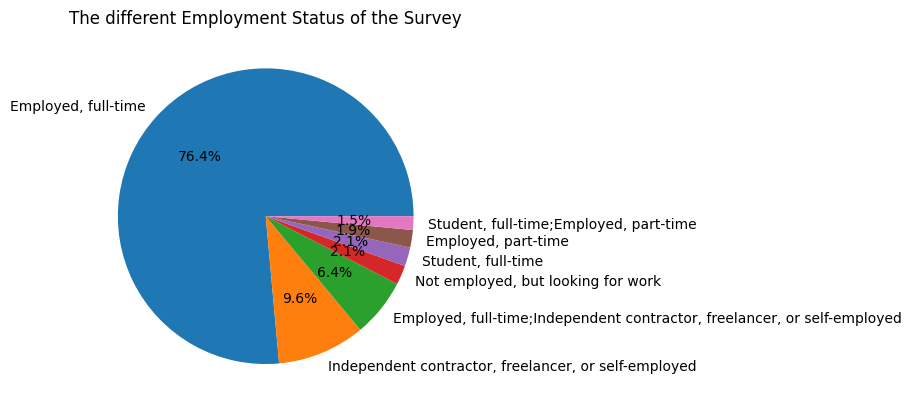

[INFO][STUDY] Our investigation will solely focus on the population of 'active developers by profession' who are 62746 and represent 70.4% of the respondents.

[INFO][STUDY] The 'Employment' column of the study contains the following answers:
Employment
Employed, full-time                                                                                                                47441
Independent contractor, freelancer, or self-employed                                                                                5963
Employed, full-time;Independent contractor, freelancer, or self-employed                                                            3959
Not employed, but looking for work                                                                                                  1301
Employed, part-time                                                                                                                 1187
Employed, full-time;Student, part-time                       

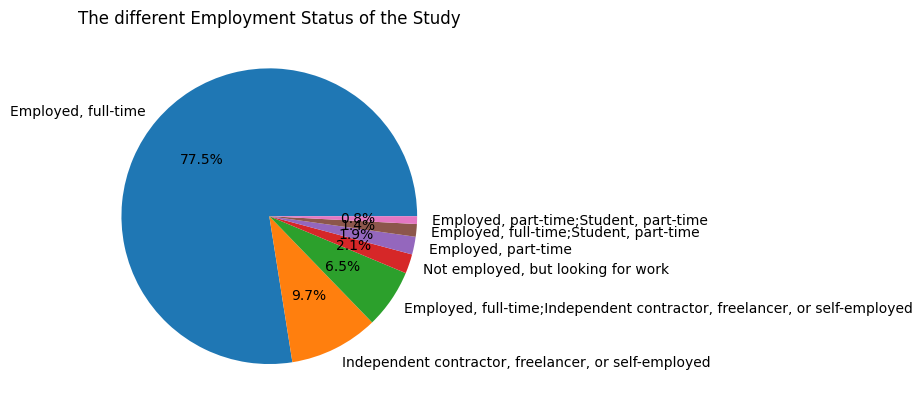

In [7]:
# STEP-0: Get to know the content of the 'Employment' column
if VERBOSE > 2:
    print(f"\n[INFO][SURVEY] The \'Employment\' column of the survey contains the following answers:")
    print(df['Employment'].value_counts(dropna=False))
if VERBOSE > 1:    
    bu.pie_chart(df_developers.Employment.value_counts(), 
              'The different Employment Status of the Survey', fig_save=False)

# STEP-1: Create a subset of the dataset containing only professional developers who are employed.
#         We use the question "_ID296/Employment/Which of the following best describes your current employment status?_".
df_active_developers = df_developers[
                        ~(df_developers['Employment'].str.contains('Student, full-time') |
                          df_developers['Employment'].str.contains('Not employed, and not looking for work') | 
                          df_developers['Employment'].str.contains('I prefer not to say'))]
# Futher remove a few employment status
df_active_developers = df_active_developers[
                        ~df_active_developers['Employment'].isin(['Student, part-time',
                                                                  'Retired'])]
active_developers = df_active_developers.shape[0]
print(f"[INFO][STUDY] Our investigation will solely focus on the population of \'active developers by profession\' who are {active_developers} and represent {(100*active_developers/respondents):.1f}% of the respondents.")

# STEP-2: Display the resulting pie chart
if VERBOSE > 2:
    print(f"\n[INFO][STUDY] The \'Employment\' column of the study contains the following answers:")
    print(df_active_developers.Employment.value_counts().head(30))
if VERBOSE > 1:    
    bu.pie_chart(df_active_developers.Employment.value_counts(), 
              'The different Employment Status of the Study', fig_save=False)

### 3.3- Refining the statistical population per language
The survey collects responses from people having developed in various programming and scripting languages.
Because we are only interested by the usage of the Rust language, we will drop all the responents who are not a Rust user, a Rust lover or a Rust admirer.
- We define a Rust **user** as a respondent who has done extensive development work in Rust over the past year.
- We define a Rust **admirer** as a respondent who wants to work in Rust over the next year.
- We define a Rust **lover** as a Rust user who wants to continue working in Rust over the next year.  


[INFO][SURVEY] The 'LanguageHaveWorkedWith' column of the survey contains the following answers:
LanguageHaveWorkedWith
NaN                                                                                                   2044
HTML/CSS;JavaScript;TypeScript                                                                        1487
Python                                                                                                1132
HTML/CSS;JavaScript                                                                                    735
HTML/CSS;JavaScript;PHP;SQL                                                                            718
                                                                                                      ... 
Bash/Shell (all shells);C;C#;Java;JavaScript;Perl;PHP;Python;SQL                                         1
Assembly;C;JavaScript;MATLAB;SQL                                                                         1
C#;Crystal             

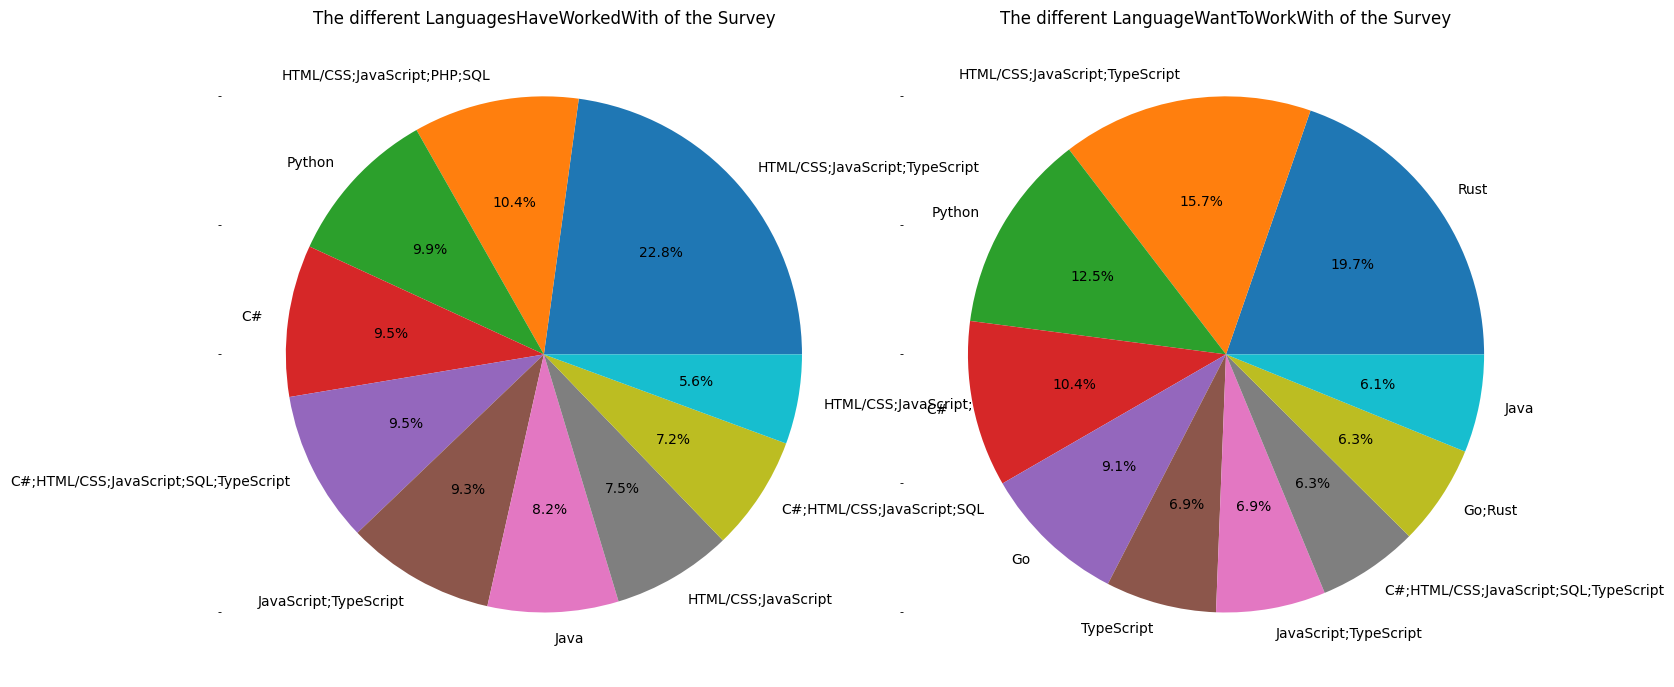

[INFO][STUDY] Our investigation will focus on a population of 7045 Rust users and 18410 Rust admirers who represent 7.9% and 20.6% of the respondents respectively.
[INFO][STUDY] They are 5984 Rust lovers among the Rust users, and they represents 84.9% of the Rust users.


In [8]:
# STEP-0: Get to know the content of the 'Language' columns
if VERBOSE > 2:
    print(f"\n[INFO][SURVEY] The \'LanguageHaveWorkedWith\' column of the survey contains the following answers:")
    print(df['LanguageHaveWorkedWith'].value_counts(dropna=False))
    print(f"\n[INFO][SURVEY] The \'LanguageWantToWorkWith\' column of the survey contains the following answers:")
    print(df['LanguageWantToWorkWith'].value_counts(dropna=False))
if VERBOSE > 1:
    bu.two_pie_chart(df_developers.LanguageHaveWorkedWith.value_counts(),
                    'The different LanguagesHaveWorkedWith of the Survey',
                    df_developers.LanguageWantToWorkWith.value_counts(),
                    'The different LanguageWantToWorkWith of the Survey',
                    mode='row',
                    fig_title='Survey answers for \'LanguageHaveWorkedWith\' and \'LanguageWantToWorkWith\' ',  
                    fig_save=False)

# STEP-1: Create a subset of the dataset containing only active employed professional developers who are a Rust user or a Rust admirer.
#         We use the question "_ID233/Language/Which programming, scripting, and markup languages have you done extensive development work in over the past year, and which do you want to work in over the next year?_".
df_rust_users    = df_active_developers[(df_active_developers['LanguageHaveWorkedWith'].str.contains('Rust', na=False))]
df_rust_admirers = df_active_developers[(df_active_developers['LanguageWantToWorkWith'].str.contains('Rust', na=False))]
rust_users    = df_rust_users.shape[0]
rust_admirers = df_rust_admirers.shape[0]
print(f"[INFO][STUDY] Our investigation will focus on a population of {rust_users} Rust users and {rust_admirers} Rust admirers who represent {(100*rust_users/respondents):.1f}% and {(100*rust_admirers/respondents):.1f}% of the respondents respectively.")

# STEP-2: Create the 'df_rust_lovers' by joining the Rust users and the Rust 'admirers'.
df_rust_lovers = pd.merge(df_rust_users, df_rust_admirers, how='inner')
rust_lovers = df_rust_lovers.shape[0]
print(f"[INFO][STUDY] They are {rust_lovers} Rust lovers among the Rust users, and they represents {(100*rust_lovers/rust_users):.1f}% of the Rust users.")


## 4- BUSINESS QUESTIONS

### 4.1- What are the job types of the Rust lovers?
In this section, we try to get an idea of the type of job and development work that the **Rust lovers** are doing in their daily life. Remember that the Rust lovers are the respondents who have you done extensive development work in Rust over the **past year**, and who want to continue working in Rust over the **next year**.  


[INFO][STUDY] The 'DevType' column of 'df_rust_lovers' contains the following answers:
DevType
Developer, full-stack                            2010
Developer, back-end                              1411
Developer, embedded applications or devices       353
Developer, desktop or enterprise applications     271
Other (please specify):                           169
Developer, front-end                              166
Research & Development role                       157
Cloud infrastructure engineer                     128
DevOps specialist                                 125
Developer, game or graphics                       119
Engineering manager                               117
Senior Executive (C-Suite, VP, etc.)              117
Data scientist or machine learning specialist     114
Blockchain                                        113
Engineer, data                                     85
Developer, mobile                                  80
Academic researcher                     

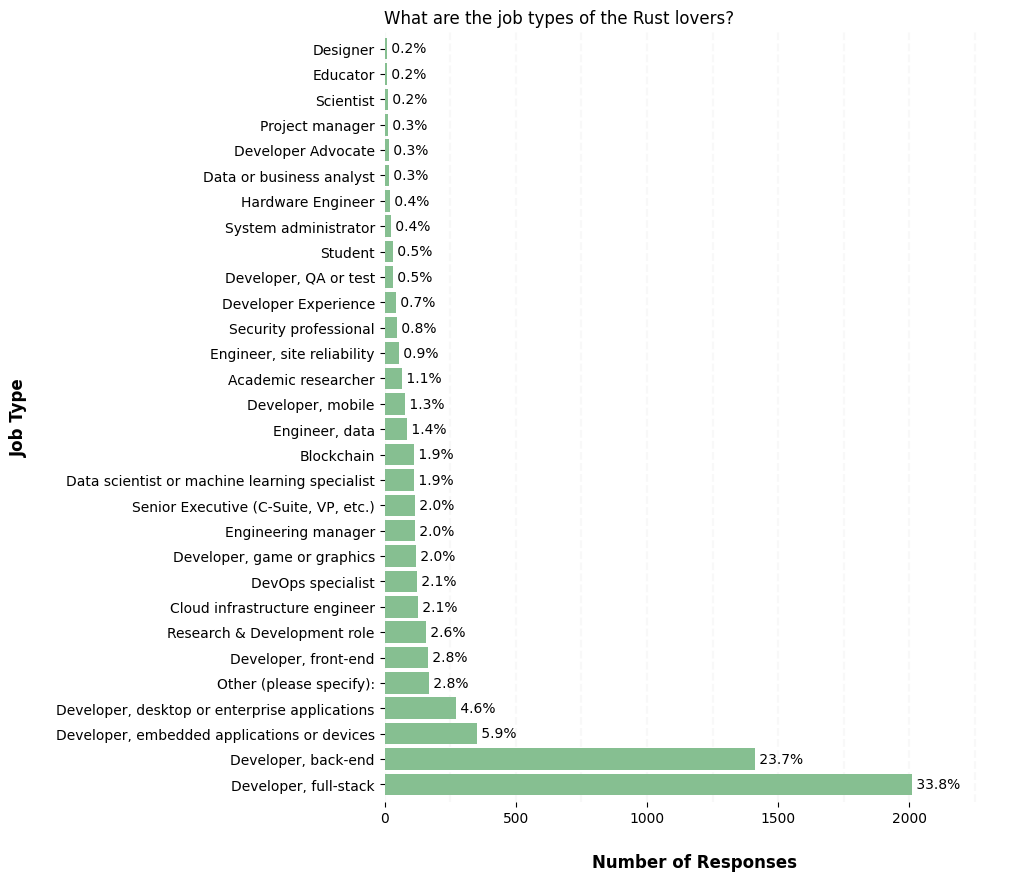

In [9]:
# STEP-0: Get to know the content of the 'DevType' column
if VERBOSE > 2:
    print(f"\n[INFO][STUDY] The \'DevType\' column of 'df_rust_lovers' contains the following answers:")
    print(df_rust_lovers['DevType'].value_counts(dropna=True))

# STEP-1: Show me the kinds of development types that the Rust lovers are doing
bu.barh_chart(df_rust_lovers.DevType.value_counts(dropna=True), 
           'What are the job types of the Rust lovers?', color='#86bf91', fig_save=True)

### 4.2- What are the best Rust paying jobs?
In this section, we try to get an idea about the best paying jobs among the type of development works that the **Rust lovers** are doing in their daily life. Remember that the Rust lovers are the respondents who have you done extensive development work in Rust over the **past year**, and who want to continue working in Rust over the **next year**.

Let's compute the proportion of missing compensation values in the `ConvertedCompYearly` column to figure out if we can effevtively work with this column.

In [10]:
# Proportion of missing compensation values (can we work with this column)
missing_value = df_rust_lovers['ConvertedCompYearly'].isnull().mean()
missing_value

0.2767379679144385

Next, let's compute the median Rust salary per job type to answer the business question. Note that we remove the outliers using a `threshold=2` for the z-scores because some part-time students seem to have entered unrealistic big salaries.     


[INFO][STUDY] The median Rust salaries per job type are as folows:
The name of the series is: ConvertedCompYearly 
DevType
Student                                          282385.0
Developer Advocate                               133862.0
Cloud infrastructure engineer                    130000.0
Engineering manager                              127472.0
Senior Executive (C-Suite, VP, etc.)             124569.0
Scientist                                        120449.0
Security professional                            120000.0
Developer Experience                             120000.0
Engineer, site reliability                       119493.5
Blockchain                                       113209.5
Data scientist or machine learning specialist    107090.0
Other (please specify):                          103035.0
Research & Development role                       98165.5
Engineer, data                                    97793.0
Developer, mobile                                 96811.5
Design

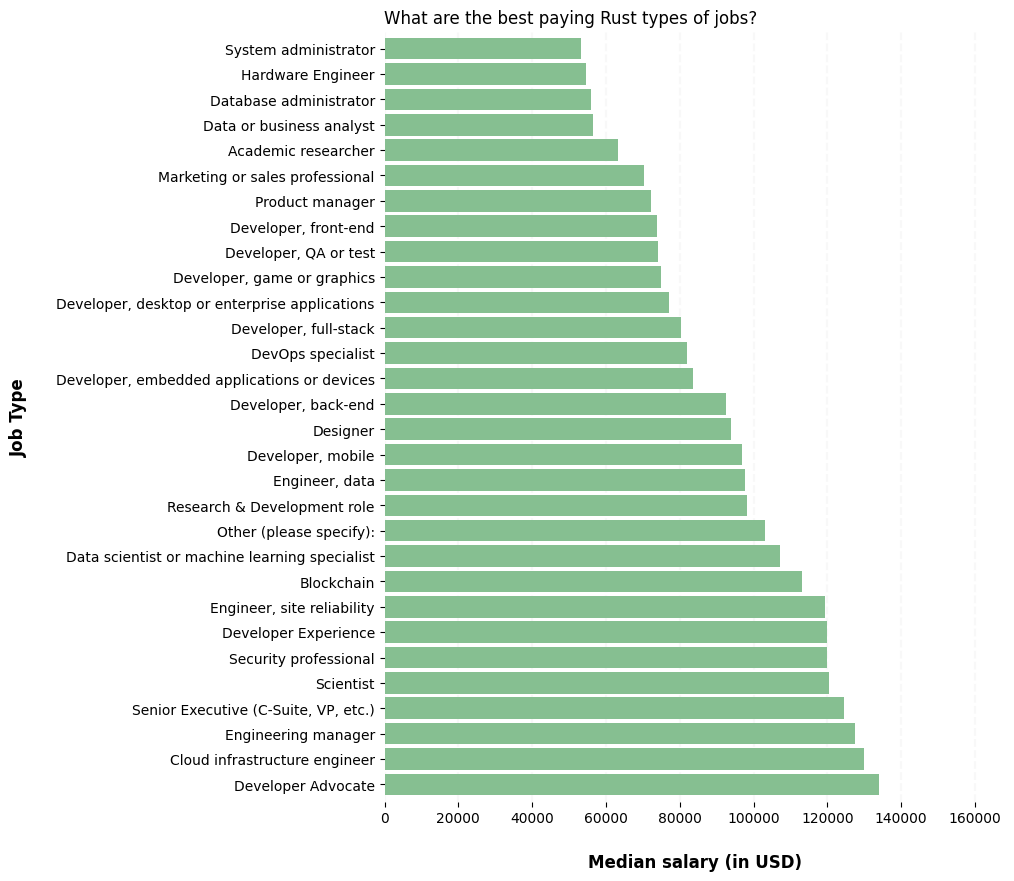

In [11]:
# STEP-1: Compute the median Rust salary per job type
sr_rust_salaries = df_rust_lovers.groupby('DevType').median(numeric_only=True)['ConvertedCompYearly'].sort_values(ascending=False)

if VERBOSE > 2:
    print(f"\n[INFO][STUDY] The median Rust salaries per job type are as folows:")
    print(f"The name of the series is: {sr_rust_salaries.name} ")
    print(sr_rust_salaries)
    
# STEP-2: Remove the outliers by setting a threshold
z_scores = np.abs((sr_rust_salaries - sr_rust_salaries.mean()) / sr_rust_salaries.std())
if VERBOSE > 3:
    print(f"\n[INFO][STUDY] The z-scores of the Rust salaries per job type are as folows:")
    print(z_scores)
threshold = 2    
sr_rust_salaries = sr_rust_salaries[z_scores < threshold]

# STEP-3: Show me the average Rust salary per development types
bu.barh_chart(sr_rust_salaries, 'What are the best paying Rust types of jobs?', color='#86bf91', fig_save=False)

# STEP-4: Show me the resulting median Rust salary
print(f"\n[INFO][STUDY] The median salary of the Rust lovers is: {sr_rust_salaries.median()} USD")


### 4.3- What languages do Rust admirers develop in 2023?
In this section, we try to get an idea of the type of programming and scripting languages that the **Rust admirers** are using in their daily life. Remember that the Rust admirers are the respondents who have done extensive development work in a given language over the **past year**, and who want to work in Rust over the **next year**.

In [12]:
df_rust_admirers['LanguageHaveWorkedWith']

1                               HTML/CSS;JavaScript;Python
2                               Bash/Shell (all shells);Go
4                           HTML/CSS;JavaScript;TypeScript
5        Bash/Shell (all shells);HTML/CSS;JavaScript;Ru...
7        Go;HTML/CSS;JavaScript;Python;Rust;SQL;TypeScript
                               ...                        
89152                                               C#;Lua
89153                   Bash/Shell (all shells);Python;SQL
89158                                           TypeScript
89164                   Go;HTML/CSS;Java;JavaScript;Python
89165                  C;C#;C++;Java;JavaScript;TypeScript
Name: LanguageHaveWorkedWith, Length: 18410, dtype: object

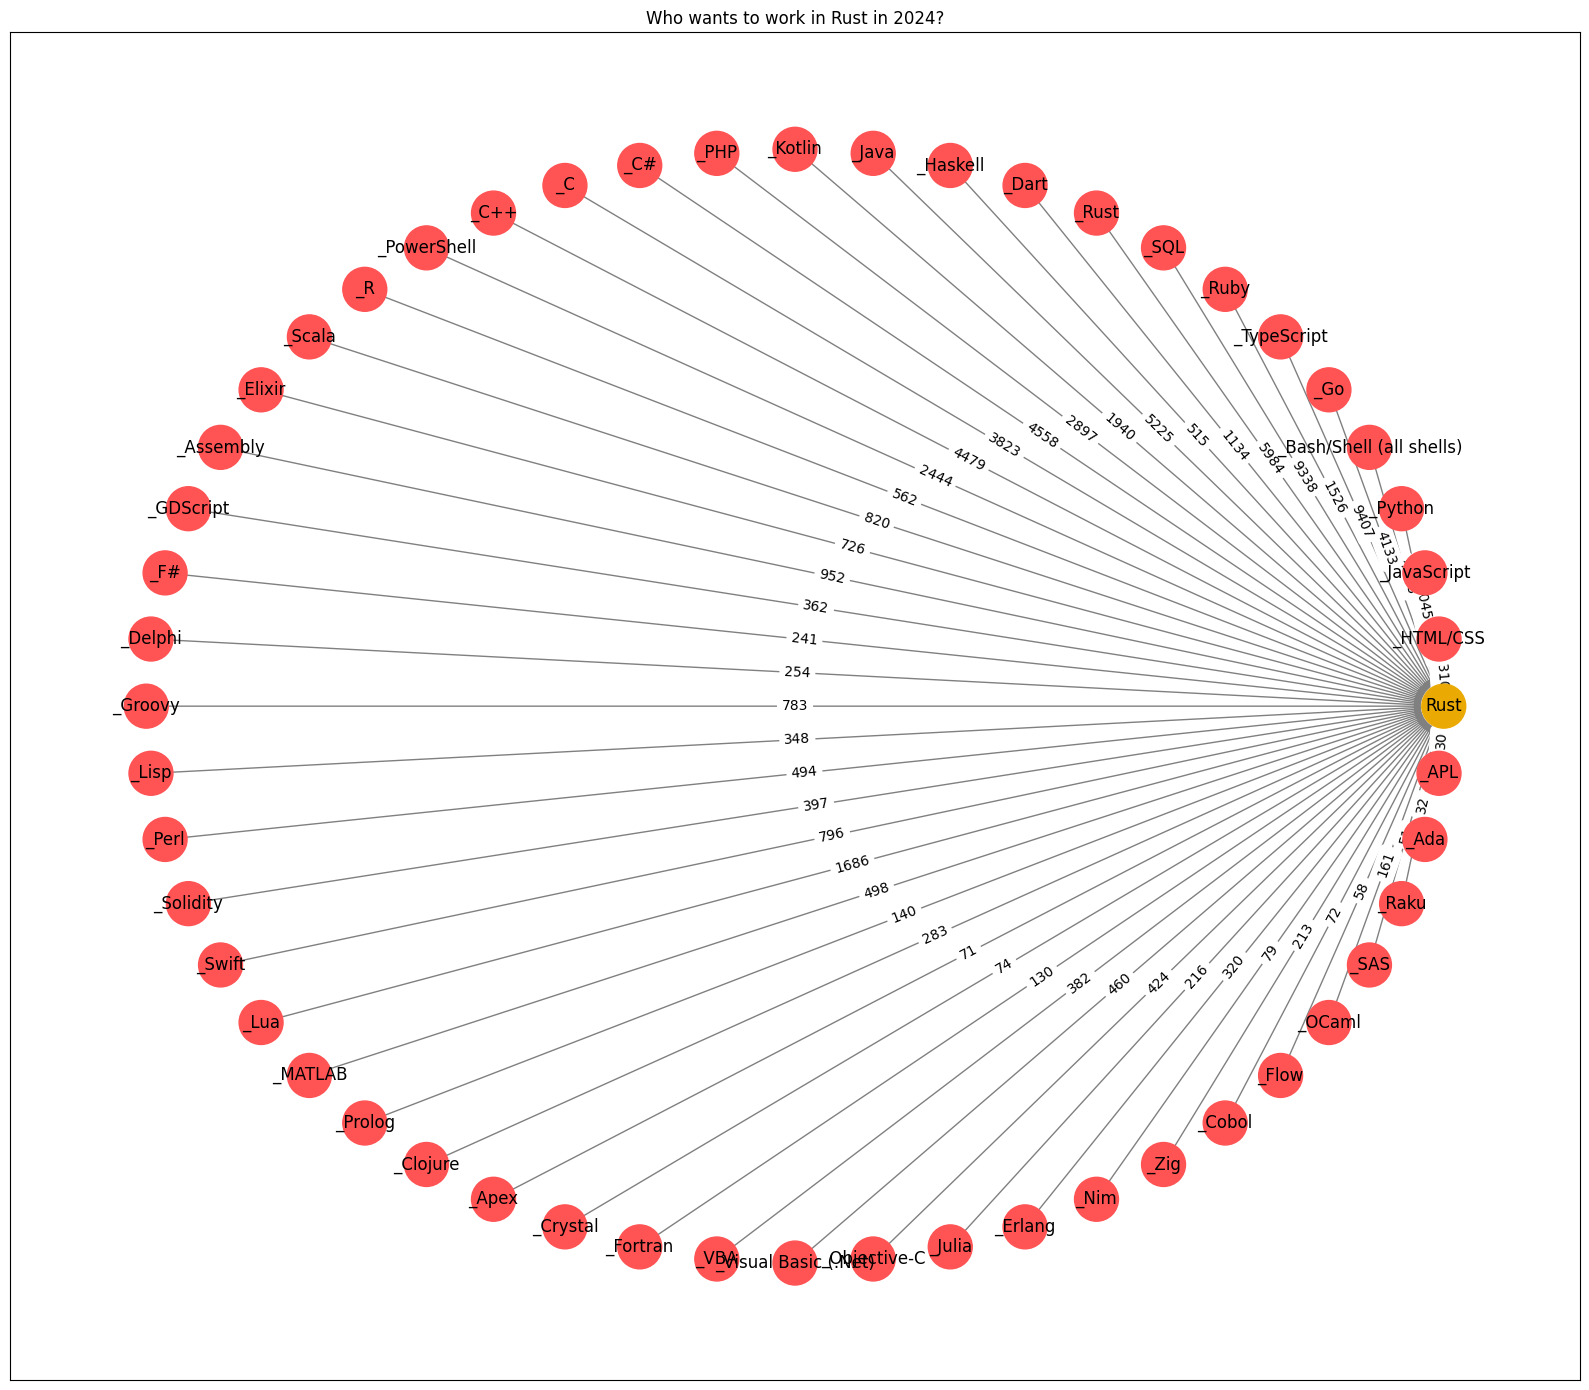

,Names,Children,Weights,Percentage
2,_JavaScript,Rust,12001,65.187398
3,_Python,Rust,10457,56.800652
6,_TypeScript,Rust,9407,51.097230
8,_SQL,Rust,9338,50.722433
1,_HTML/CSS,Rust,9310,50.570342
4,_Bash/Shell (all shells),Rust,8038,43.661054
9,_Rust,Rust,5984,32.504074
12,_Java,Rust,5225,28.381315
15,_C#,Rust,4558,24.758284
17,_C++,Rust,4479,24.329169


In [13]:
df_nodes = bu.rust_dependency_graph(df_rust_admirers, df_rust_users, 
                                'Who wants to work in Rust in 2024?', 'admirers')

if VERBOSE > 0:
    df_edges = pd.DataFrame({
        'Names'   : df_nodes['Names'].repeat(df_nodes['Children'].str.len()),
        'Children': [item for sublist in df_nodes['Children'] for item in sublist],
        'Weights' : [item for sublist in df_nodes['Weights']   for item in sublist]
    })
    # Add a new column with percentage
    df_edges['Percentage'] = (df_edges['Weights'] / df_rust_admirers.shape[0]) * 100
    
    df_edges = df_edges.sort_values('Weights', ascending=False)
    display(df_edges.head(len(df_edges)))
    
if VERBOSE > 6: # [TODO - Work-in-progress]
    # Create a bar chart of the edges
    df_edges.plot(x='Children', y='Weights', kind='bar', color='red')
    # Display the chart
    plt.show()    

### 4.4- What languages do the Rust users want to code in 2024?
In this section, we try to get an idea of the type of programming and scripting languages that the **Rust users** want to use in 2024. Remember that the Rust users are the respondents who have done extensive development work in Rust over the **past year**.

In [19]:
df_rust_lovers['LanguageWantToWorkWith']

0       Elixir;Go;Julia;Python;R;Rust;Scala;SQL;TypeSc...
1          Bash/Shell (all shells);Go;PHP;Rust;TypeScript
2         Ada;Go;Kotlin;Lisp;Python;R;Rust;SQL;TypeScript
3                                                 Go;Rust
4                 HTML/CSS;JavaScript;PHP;Python;Rust;SQL
                              ...                        
5979                           C++;JavaScript;Python;Rust
5980    C#;Dart;HTML/CSS;JavaScript;Lua;Rust;SQL;TypeS...
5981                              C++;Go;Java;Kotlin;Rust
5982             C++;Fortran;Haskell;Lisp;Python;Rust;SQL
5983                            Elixir;Erlang;Python;Rust
Name: LanguageWantToWorkWith, Length: 5984, dtype: object

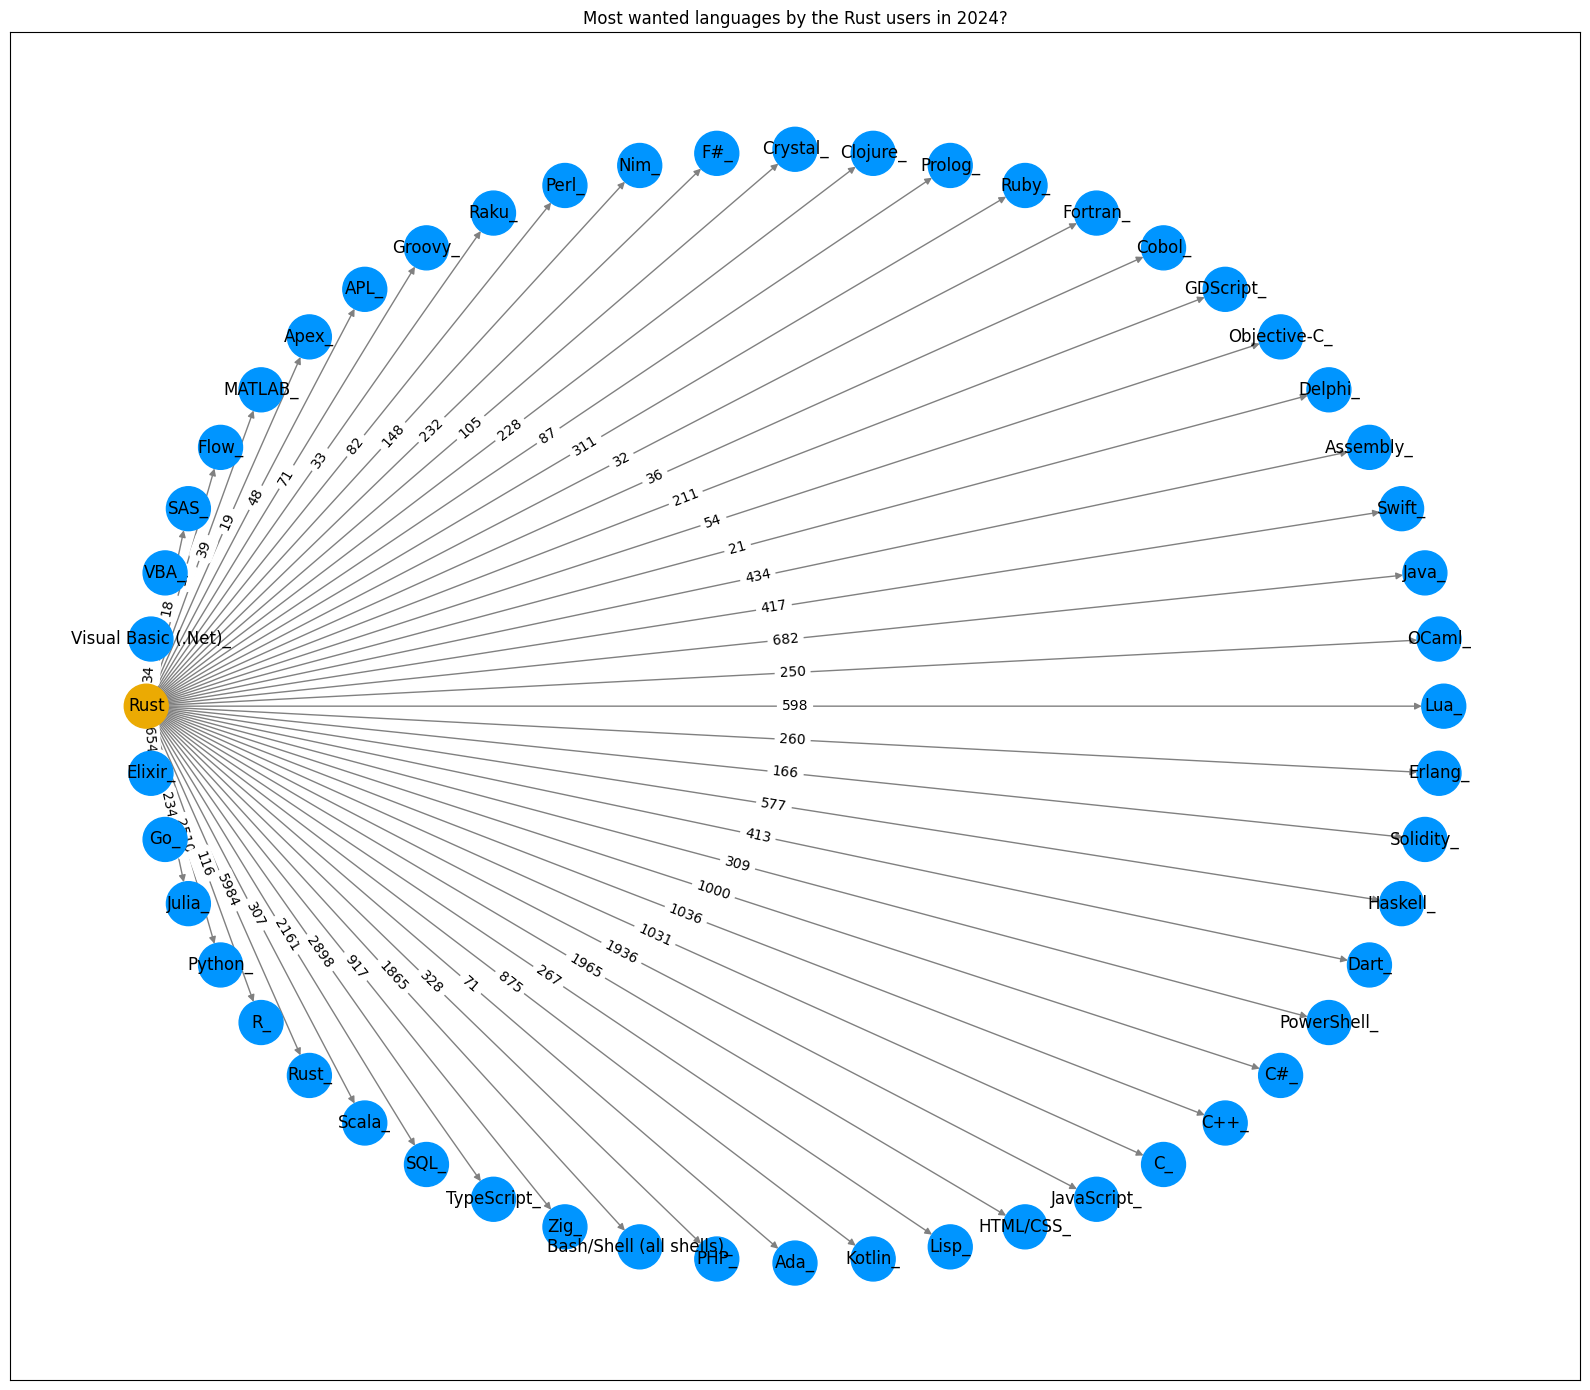

,Names,Children,Weights,Percentage
0,Rust,Rust_,5984,84.939674
0,Rust,TypeScript_,2898,41.135557
0,Rust,Python_,2510,35.628105
0,Rust,SQL_,2161,30.674237
0,Rust,HTML/CSS_,1965,27.892122
0,Rust,JavaScript_,1936,27.480483
0,Rust,Bash/Shell (all shells)_,1865,26.472676
0,Rust,Go_,1794,25.464869
0,Rust,C++_,1036,14.705465
0,Rust,C_,1031,14.634493


In [20]:
df_nodes = bu.rust_dependency_graph(df_rust_admirers, df_rust_users, 
                      'Most wanted languages by the Rust users in 2024?', 'users')
if VERBOSE > 0:
    df_edges = pd.DataFrame({
        'Names'   : df_nodes['Names'].repeat(df_nodes['Children'].str.len()),
        'Children': [item for sublist in df_nodes['Children'] for item in sublist],
        'Weights' : [item for sublist in df_nodes['Weights']   for item in sublist]
    })
    # Add a new column with percentage
    df_edges['Percentage'] = (df_edges['Weights'] / df_rust_users.shape[0]) * 100
    
    df_edges = df_edges.sort_values('Weights', ascending=False)
    display(df_edges.head(len(df_edges)))
    
if VERBOSE > 6:
    # Create a bar chart of the edges
    df_edges.plot(x='Children', y='Weights', kind='bar', color='blue')
    # Display the chart
    plt.show()    

## 5- GENERATE A BLOG POST IMAGE
Let's try to generate an image that might be usable for out blog post. It should hafe Rust somehow in the middle and the various loved and wanted languages surounding and connecting to it.

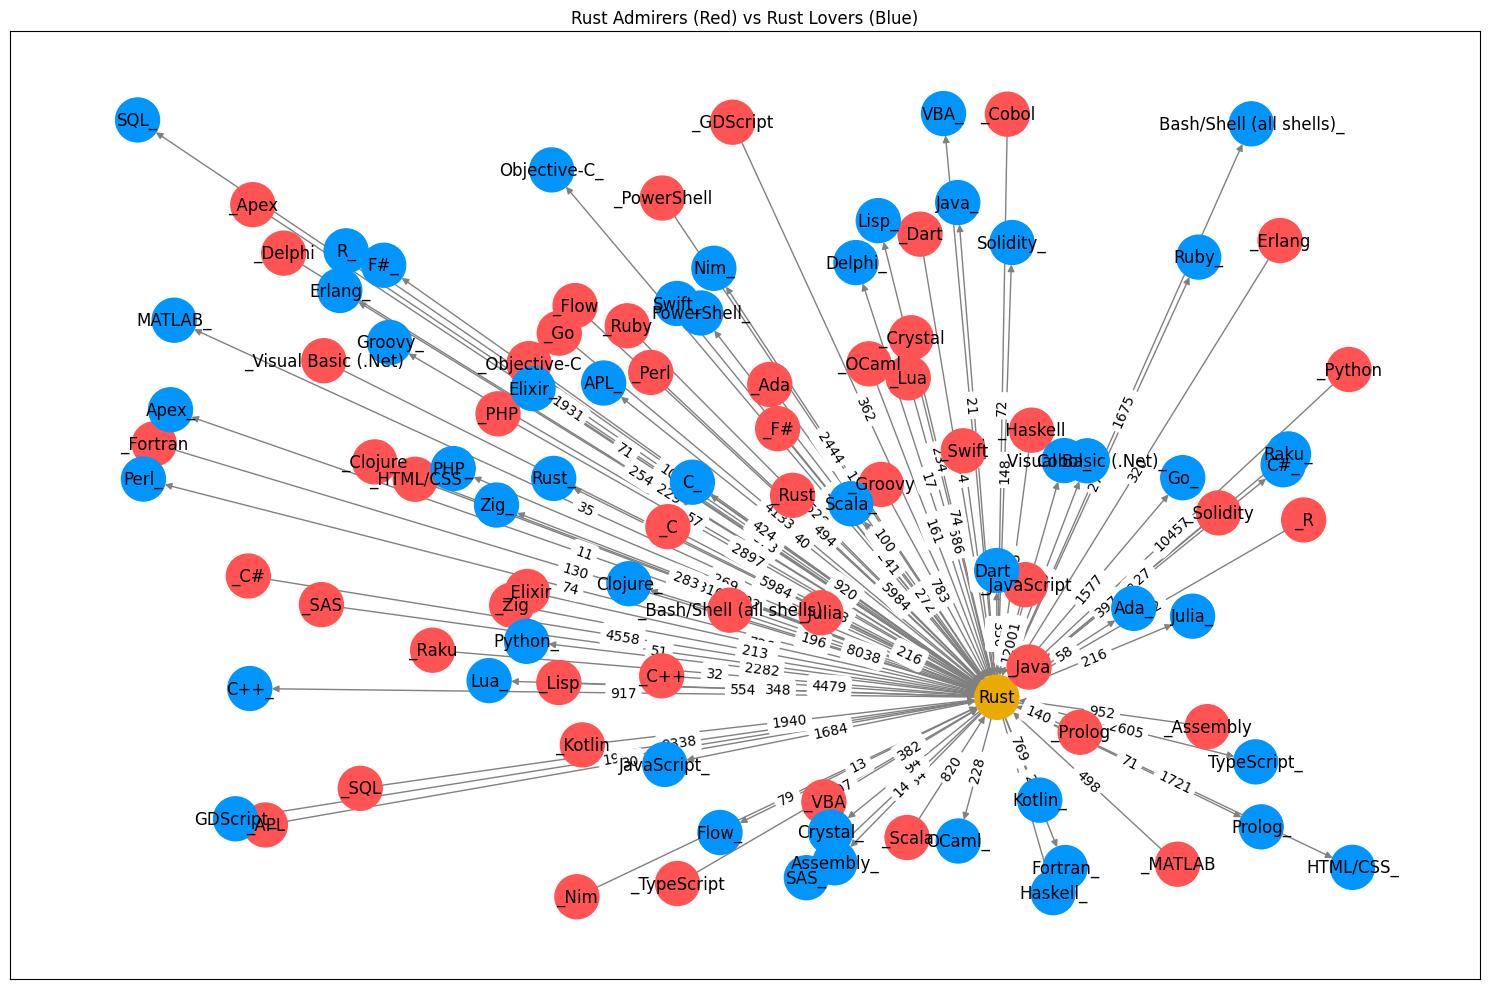

,Names,Colors,Children,Weights
0,Rust,#EBAA03,"[Elixir_, Go_, Julia_, Python_, R_, Rust_, Sca...","[578, 1577, 216, 2282, 100, 5984, 272, 1931, 2..."
1,_HTML/CSS,#FF0000,[Rust],[9310]
2,_JavaScript,#FF0000,[Rust],[12001]
3,_Python,#FF0000,[Rust],[10457]
4,_Bash/Shell (all shells),#FF0000,[Rust],[8038]
5,_Go,#FF0000,[Rust],[4133]
6,_TypeScript,#FF0000,[Rust],[9407]
7,_Ruby,#FF0000,[Rust],[1526]
8,_SQL,#FF0000,[Rust],[9338]
9,_Rust,#FF0000,[Rust],[5984]


In [18]:
# Plot dependency graph with both admirers and lovers languages
bu.rust_dependency_graph(df_rust_admirers, df_rust_lovers, 
                      'Rust Admirers (Red) vs Rust Lovers (Blue)', 'both', 123, True)